In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import mailbox

### STEPS IN EDA-- > QUESTIONS as many as Possible (answer)

1. Data Collection -- > Loading the dataset ( At times Data is present in different files in different formats)
    
2. Data Transformation-
   You may not need all the data which is collected -> Discard the data/columns beforehand to avoid being overwhelmed
   
   a.Data Cleansing
       Q. Are date columns in correct date format? (use df.dtypes method in pandas)
       --> use pd.to_datetime(column_name)
       Q. How many missing values(NaN) are present?
       Q. How to handle the missing values? Or should I drop the missing values only present in a specific column?
       Q. Is dropping missing values significantly reducing the shape of the dataset?
       Q. If I can't drop missing values, what are the ways to replace missing ways?
       --> Imputation - Replacing data with mean,median and mode ( only useful if missing data is small)
                        Time Series Methods
                        Last observation carried forward & Next Observation carried backward
                        Linear Interpolation
                        
    b. Descriptive Statistics:
        Q. Data sanity- check what is overall data? (use df.info() method in pandas). What does the data look like
            (Use df.head() in pandas)
        
        
        
        
    c. Data Refactoring
        Q. Does any column need changes? lot of columns may have text data which should be cleaned/extracted as per need
            (re module in python is helpful OR pandas has great string handling methods)
            
        Q. Do we need additional columns? Columns which can add category ie. Male/Female, Human/Animal, Spam/no-spam 
            Based on the information present in other columns.
            
    d. Dropping Columns:
    
        Drop unnecessary columns. Less is Cool!!
        
    e. Handling Date time Data
    
        Q. Do you need to change timezone?
        Q. Do you need additional data columns i.e DayOfWeek, Month, Year (This is super important when you want to
           aggregate data later based on such parameters)
            
**3. Data Analysis:**


**Data Analysis** is the most important aspect of any data analytics/data science project. Basically DA is asking yourself questions (preferably meaningful) even if you know finding answers for these questions could be difficult.

Chances are you are a bit exhausted at this point due to data cleaning (you took hours to handle particular string problem).
Best start could be to go back and ask on why did we even start the exercise of EDA? What business problem do we have? (solve it later, understand it first)

Typical Questions on DA look as below:

1. How many (customers, items, students, machines, stores) from (region, category, school, facility, city) need attention?
2. What is the top (customer, item, student, machine, store) 
3. What is the least (customer, item, student, machine, store)
4. KPI's with respect to Business Problem.


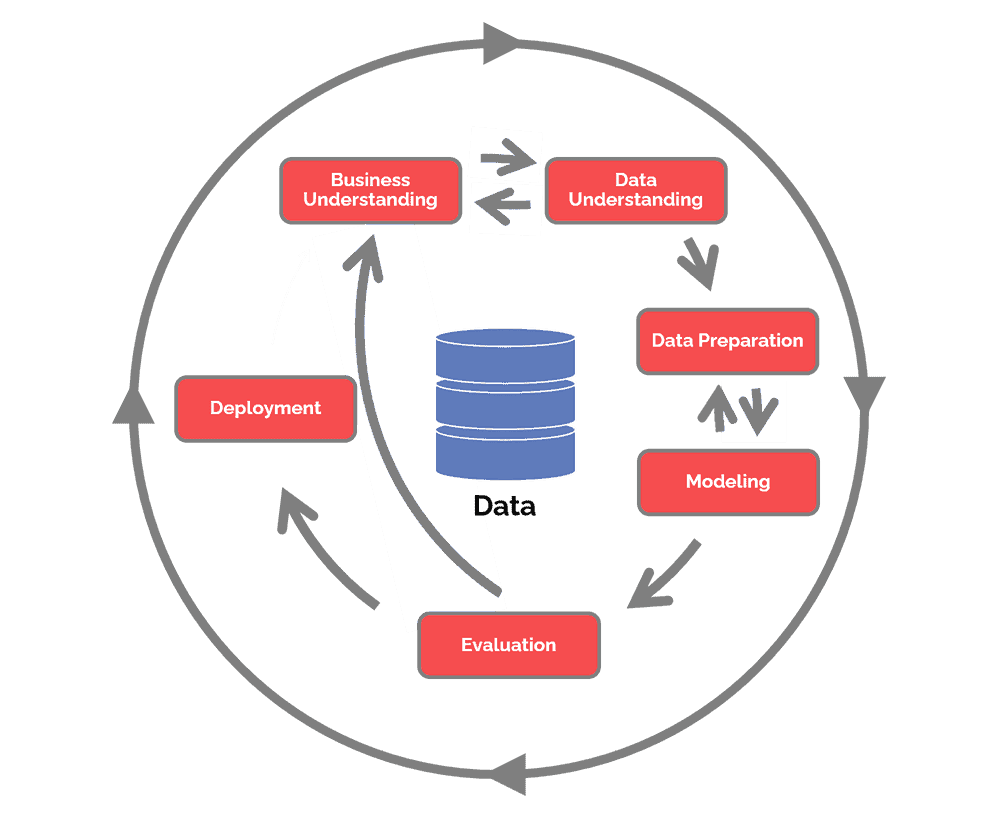

In [8]:
mboxfile = 'Takeout/Mail/All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(mboxfile)

In [9]:
mbox

In [13]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
Received
Received
Content-Transfer-Encoding
Content-Type
Date
From
Mime-Version
Subject
Message-ID
X-Feedback-ID
X-SG-EID
X-SG-ID
To
X-Entity-ID
List-Unsubscribe


In [17]:
import csv

In [22]:
with open('mailbox.csv','w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to'])
    
for message in mbox:
    writer.writerow([
            message['subject'],
            message['from'],
            message['date'],
            message['to']
          ])

ValueError: I/O operation on closed file.

In [24]:
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    
    
    for message in mbox:
        try:
            writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])
            
        except UnicodeEncodeError:
            writer.writerow(['error','error','error','error','error','error'])
        
        
        

In [150]:
df = pd.read_csv('mailbox.csv')

In [151]:
df['date']=df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce',
utc=True))

C:\Users\ketan\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\ketan\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [152]:
df = df[df['date'].notna()]

In [153]:
df

,subject,from,date,to,label,thread
0,This is the best offer on our app =?UTF-8?B?8J...,Zomato <noreply@mailers.zomato.com>,2023-02-23 05:57:07+00:00,ketanbutte98@gmail.com,"Archived,Category Updates,Unread,misc/Zomato",1758600185451573452
1,Your Amazon.in order #408-7987167-9881160,"""Amazon.in"" <shipment-tracking@amazon.in>",2023-02-23 05:27:23+00:00,ketanbutte98@gmail.com,"Category Purchases,Inbox,Category Updates,Unread",1758598312647014899
2,Explore New Job Openings in IT Sector !!,"""Campaigns"" <campaigns@2coms.com>",2023-02-22 11:59:55+00:00,ketanbutte98@gmail.com,"Archived,Category Updates,Unread",1758595814089797376
3,"Research, Meta analysis, Project - Online/home...",TeacherOn <noreply@mailer.teacheron.com>,2023-02-22 21:53:50+00:00,ketanbutte98@gmail.com,"Inbox,Category Updates,Unread",1758569778691523036
4,Oilfield Equipment Update,"""RIGZONE"" <newsletter@rigzonemail.com>",2023-02-20 14:05:43+00:00,ketanbutte98@gmail.com,"Inbox,Category Promotions,Unread",1758360390262906116
...,...,...,...,...,...,...
24301,=?UTF-8?B?SG90IGNob2NvIG9mZmVycywganVzdCBmb3Ig...,"""IDFC FIRST Bank"" <alwaysyoufirst@emailers.idf...",2023-02-08 07:03:24+00:00,<ketanbutte98@gmail.com>,"Trash,Category Promotions,Unread",1757245566273887293
24302,JD | Data Scientist | SAS | https://www.sas.c...,Navneet Sharma <notifications@ceipalmail.com>,2022-09-13 09:45:19+00:00,"navneet.sharma@changeleaders.in, ""ketanbutte98...","Inbox,Opened,Category Updates",1743847236639752303
24303,=?UTF-8?B?SW4gZm9yIGEgdHJlYXQgLSB3ZWxjb21lIHZv...,"""IDFC FIRST Bank"" <alwaysyoufirst@emailers.idf...",2023-02-05 07:05:48+00:00,<ketanbutte98@gmail.com>,"Trash,Opened,Category Updates",1756974920906448247
24304,Verification code: 206639,Kevin Markham <no-reply@e.podia.com>,2023-02-15 19:20:01+00:00,Ketan Butte <ketanbutte98@gmail.com>,"Inbox,Opened,Category Updates",1757925924986818024


In [154]:
df.to_csv('gmail.csv')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23990 entries, 0 to 24305
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  23904 non-null  object             
 1   from     23990 non-null  object             
 2   date     23990 non-null  datetime64[ns, UTC]
 3   to       23848 non-null  object             
 4   label    23922 non-null  object             
 5   thread   23990 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1.3+ MB


In [156]:
df.head()

,subject,from,date,to,label,thread
0,This is the best offer on our app =?UTF-8?B?8J...,Zomato <noreply@mailers.zomato.com>,2023-02-23 05:57:07+00:00,ketanbutte98@gmail.com,"Archived,Category Updates,Unread,misc/Zomato",1758600185451573452
1,Your Amazon.in order #408-7987167-9881160,"""Amazon.in"" <shipment-tracking@amazon.in>",2023-02-23 05:27:23+00:00,ketanbutte98@gmail.com,"Category Purchases,Inbox,Category Updates,Unread",1758598312647014899
2,Explore New Job Openings in IT Sector !!,"""Campaigns"" <campaigns@2coms.com>",2023-02-22 11:59:55+00:00,ketanbutte98@gmail.com,"Archived,Category Updates,Unread",1758595814089797376
3,"Research, Meta analysis, Project - Online/home...",TeacherOn <noreply@mailer.teacheron.com>,2023-02-22 21:53:50+00:00,ketanbutte98@gmail.com,"Inbox,Category Updates,Unread",1758569778691523036
4,Oilfield Equipment Update,"""RIGZONE"" <newsletter@rigzonemail.com>",2023-02-20 14:05:43+00:00,ketanbutte98@gmail.com,"Inbox,Category Promotions,Unread",1758360390262906116


In [157]:
import re

In [158]:
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
#     print('email value is ',email)
#     print(not [])
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
#         print('email value now is:',email)
    return email[0] if email else np.nan

In [159]:
df['from'] = df['from'].apply(lambda x: extract_email_ID(x))

In [160]:
df.head()

,subject,from,date,to,label,thread
0,This is the best offer on our app =?UTF-8?B?8J...,noreply@mailers.zomato.com,2023-02-23 05:57:07+00:00,ketanbutte98@gmail.com,"Archived,Category Updates,Unread,misc/Zomato",1758600185451573452
1,Your Amazon.in order #408-7987167-9881160,shipment-tracking@amazon.in,2023-02-23 05:27:23+00:00,ketanbutte98@gmail.com,"Category Purchases,Inbox,Category Updates,Unread",1758598312647014899
2,Explore New Job Openings in IT Sector !!,campaigns@2coms.com,2023-02-22 11:59:55+00:00,ketanbutte98@gmail.com,"Archived,Category Updates,Unread",1758595814089797376
3,"Research, Meta analysis, Project - Online/home...",noreply@mailer.teacheron.com,2023-02-22 21:53:50+00:00,ketanbutte98@gmail.com,"Inbox,Category Updates,Unread",1758569778691523036
4,Oilfield Equipment Update,newsletter@rigzonemail.com,2023-02-20 14:05:43+00:00,ketanbutte98@gmail.com,"Inbox,Category Promotions,Unread",1758360390262906116


In [163]:
mymailid = 'ketanbutte98@gmail.com'
df['sent_received'] = df['from'].apply(lambda x : 'sent' if x == mymailid else 'inbox' )

In [162]:
df['from'].apply(lambda x : 'sent' if x == mymailid else 'inbox' ).value_counts()

inbox    23182
sent       808
Name: from, dtype: int64

In [165]:
df[df['sent_received'] == 'sent']

,subject,from,date,to,label,thread,sent_received
1118,Request to re-enter previous role-Ketan Butte,ketanbutte98@gmail.com,2023-02-18 04:33:17+00:00,"Anup.Yadav@bnymellon.com, Jaya.Paryani@bnymell...","Archived,Sent,Opened",1758141359747136536,sent
1144,Re:,ketanbutte98@gmail.com,2023-01-23 08:37:29+00:00,Apurva B <apurvabhasale@gmail.com>,"Sent,Opened",1755801237940480137,sent
1446,Re: Turing Onboarding Confirmation,ketanbutte98@gmail.com,2023-02-03 05:45:15+00:00,esmeralda.lima@turing.com,Sent,1756724986490659835,sent
1787,Fwd: Your Flight Tickets for MAA-PNQ,ketanbutte98@gmail.com,2023-01-11 12:55:18+00:00,"""apurvabhasale@gmail com"" <apurvabhasale@gmail...",Sent,1748591719693373938,sent
1930,Re: Senior Auditor (Data Analytics),ketanbutte98@gmail.com,2023-02-06 07:17:43+00:00,Prachi Poddar <prachi.poddar+m35582567@careers...,"Sent,Opened",1745273344467411473,sent
...,...,...,...,...,...,...,...
24116,"Re: Bhasale FB/Check copy,pan card for refund",ketanbutte98@gmail.com,2020-08-06 13:31:17+00:00,shashwat kothrud <tpashashwatkothrud@gmail.com>,"Sent,Opened",1674282684095216458,sent
24189,recommendation,ketanbutte98@gmail.com,2021-10-23 17:54:52+00:00,APURVA BHASALE <apru17fun@gmail.com>,"Archived,Sent",1714434010959457919,sent
24190,Fwd: Regarding Agreement Draft,ketanbutte98@gmail.com,2020-10-21 13:17:39+00:00,Apurva Bhasale <apurvabhasale@gmail.com>,"Sent,Opened",1681153368253191071,sent
24283,Re: Job Role : Data Scientist (Extentia),ketanbutte98@gmail.com,2022-10-13 10:53:59+00:00,Aditi Chaturvedi <aditichaturvedi@cetpainfotec...,"Sent,Opened",1746381358131169897,sent


In [168]:
df.drop(columns='to',inplace=True)